<a href="https://colab.research.google.com/github/hrafnkellhv/Toluleg-greining-Verkefni-1/blob/main/TG_Verk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
from scipy.sparse import diags
import math
from scipy.sparse.linalg import spsolve

np.set_printoptions(linewidth=160)

k=1 #mismunurinn í endapunktinum er bestur í k=1, dæmi 3
g=-9.81 #þyngadarhröðun í [m/s^2]
w=0.3 #breidd [m]
d=0.03 #þykkt [m]
E=1.3*10**10 #Youngs modulus of the material [Pa]
I=w*(d**3)/12 #area moment of inertia for a rod at one end [m^4]
Length=2 #lengd [m]
n=10*2**k #fjöldi búta
h=Length/n #lengdin af bútunum [m]
density=480 #eðlismassi efnis [kg/m^3]
p=100
portion=1/10 #hlutfall slánnar sem auka þyngdin er dreifð yfir []
threshold=math.floor(n*portion) #fjöldi búta sem auka þyngdin er dreifð yfir []
human=70 # auka þyngdin [kg]

def A_matrix(n):
  main_diag=6*np.ones(n)
  sub_diag1=-4*np.ones(n)
  sub_diag2=np.ones(n)
  diagonals=[sub_diag2,sub_diag1,main_diag,sub_diag1,sub_diag2]
  offsets=[-2,-1,0,1,2]
  A=diags(diagonals,offsets,shape=(n,n),format="csc")
  A[0,0:4]=[16,-9,8/3,-1/4]
  A[n-2,n-4:n]=np.array([16,-60,72,-28])/17
  A[n-1,n-4:n]=np.array([-12,96,-156,72])/17
  return A


def fx(n):
  return np.ones(n)*density*w*d*g

def sx(n):
  return fx(n)+p*g*np.sin(math.pi/Length*np.linspace(0,Length,n))

def px(n):
  threshold=math.floor(n*portion)
  px = np.zeros(n)
  px[n-int(threshold)-1:] = g*human
  return px



In [74]:
def correct(x):
  return fx(1)[0]/(24*E*I)*x**2*(x**2-4*Length*x+6*Length**2)

def correct4(x):
  return correct(x)+p*g*Length/(E*I*math.pi) * ((Length/math.pi)**3*np.sin(math.pi*x/Length)-x**3/6+Length*x**2/2-(Length/math.pi)**2*x)

def correct7(x):
  return fx(1)[0]/(24*E*I)*x**2*(Length-x)**2+(p*g*Length**2/(math.pi**4*E*I))*(Length**2*np.sin(math.pi*x/Length)+math.pi*x*(x-Length))

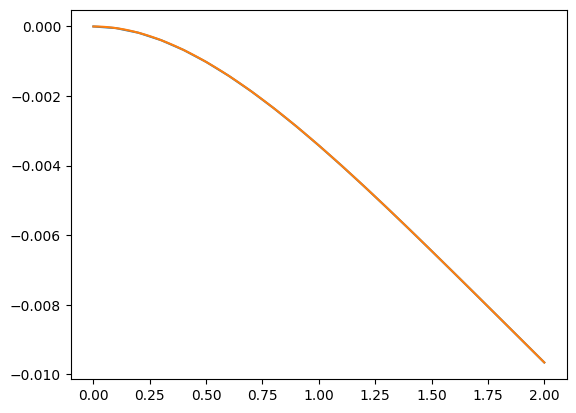

0 2.555247680113837e-15
1 1.2384190894998426e-14
2 5.533767888366015e-15
3 1.979456529244139e-12
4 1.381841689684915e-11
5 2.9348002500428905e-10
6 5.850543365742977e-10
7 6.915120793690721e-09
8 2.959371020044843e-07
9 3.8339869415371375e-07
10 5.040394692242857e-05
11 0.00020827098196557307


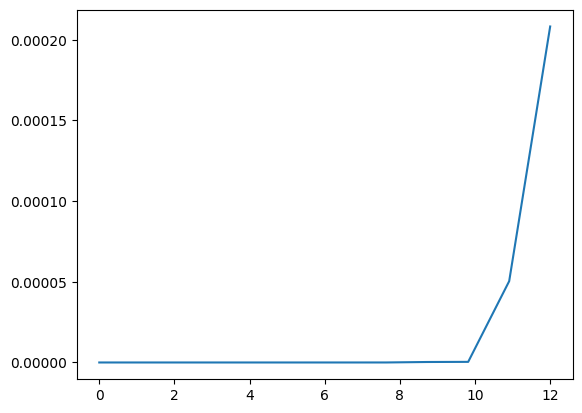

In [75]:
import matplotlib.pyplot as plt
y1=spsolve(A_matrix(n),(h**4/(I*E))*fx(n))

plt.figure()
plt.plot(np.linspace(0,Length,n+1),np.concatenate(([0],y1)))
plt.plot(np.linspace(0,Length,100),correct(np.linspace(0,Length,100)))
plt.show()

correction=[]
for i in range(12):
  n=10*2**i
  h=Length/n
  y=spsolve(A_matrix(n),(h**4/(I*E))*fx(n))
  print(i,abs(correct(Length)-y[n-1]))
  correction.append(abs(correct(Length)-y[n-1]))
plt.figure()
plt.plot(np.linspace(0,12,12),correction)
plt.show()


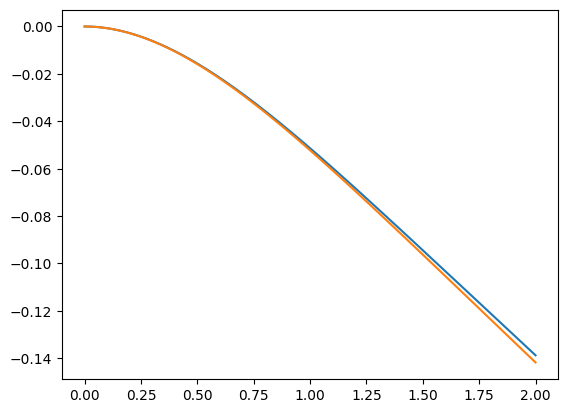

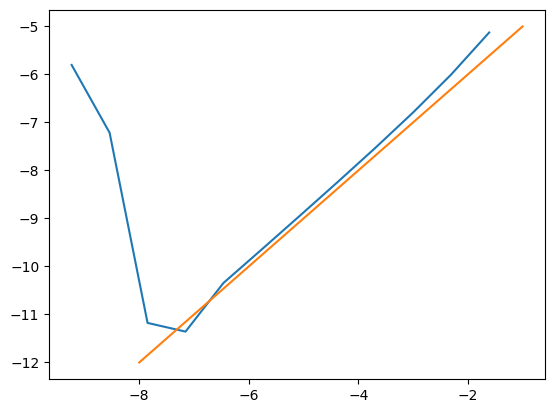

In [76]:
#plt.plot(np.linspace(0,Length,n),sx(n))

y=spsolve(A_matrix(n),(h**4/(I*E))*sx(n))
plt.figure()
plt.plot(np.linspace(0,Length,n+1),np.concatenate(([0],y)))
plt.plot(np.linspace(0,Length,100),correct4(np.linspace(0,Length,100)))
plt.show()

correction=[]
hs=[]
for k in range(12):
  n=10*2**k
  h=Length/n
  y=spsolve(A_matrix(n),(h**4/(I*E))*sx(n))
  correction.append(math.log(abs(correct4(Length)-y[n-1])))
  hs.append(math.log(h))
plt.figure()
plt.plot(hs,correction)
plt.plot(np.linspace(-8,-1,7),np.linspace(-8,-1,7)-4)
plt.show()

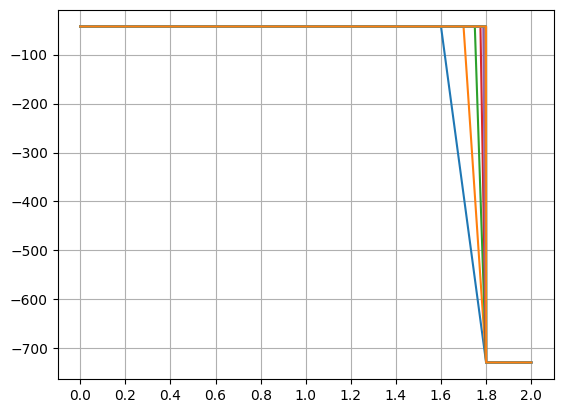

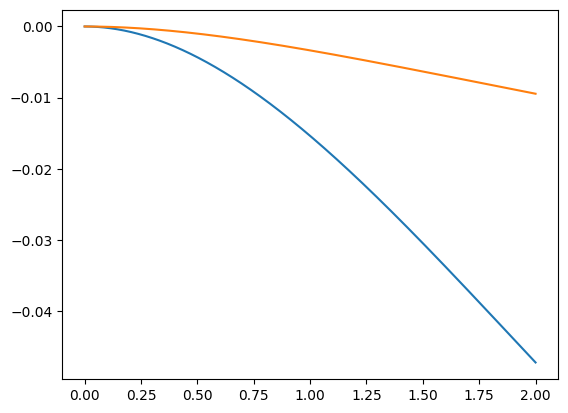

0 0.05686632478633946
1 0.04761380854707018
2 0.04308096901706909
3 0.04083833185607505
4 0.03972301249210315
5 0.039166858005783976
6 0.038889162536489656
7 0.03875042903178563
8 0.038679863111009544
9 0.03864764023521529
10 0.03842837220732342
11 0.037765133454289224


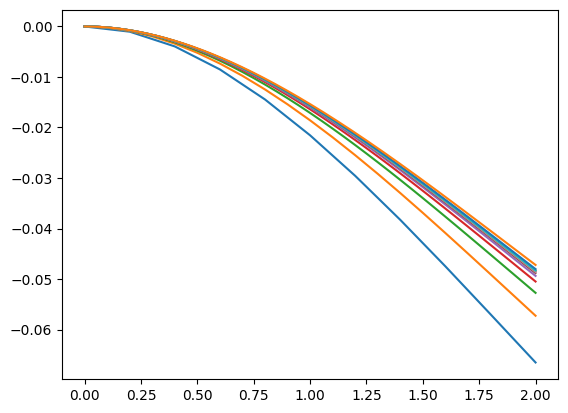

In [79]:
plt.figure()
plt.xticks(np.linspace(0,Length,11))
plt.grid()
for k in range(12):
  n=10*2**k
  plt.plot(np.linspace(0,Length,n+1),np.concatenate(([fx(1)[0]],px(n)+fx(n))))
plt.show()


y1=spsolve(A_matrix(n),(h**4/(I*E))*(px(n)+fx(n)))
y2=spsolve(A_matrix(n),(h**4/(I*E))*fx(n))

plt.figure()
plt.plot(np.linspace(0,Length,n+1),np.concatenate(([0],y1)))
plt.plot(np.linspace(0,Length,n+1),np.concatenate(([0],y2)))
plt.show()

for i in range(12):
  n=10*2**i
  h=Length/n
  y1=spsolve(A_matrix(n),(h**4/(I*E))*(px(n)+fx(n)))
  y2=spsolve(A_matrix(n),(h**4/(I*E))*fx(n))
  print(i,abs(y1[n-1]-y2[n-1]))
  plt.plot(np.linspace(0,Length,n+1),np.concatenate(([0],y1)))

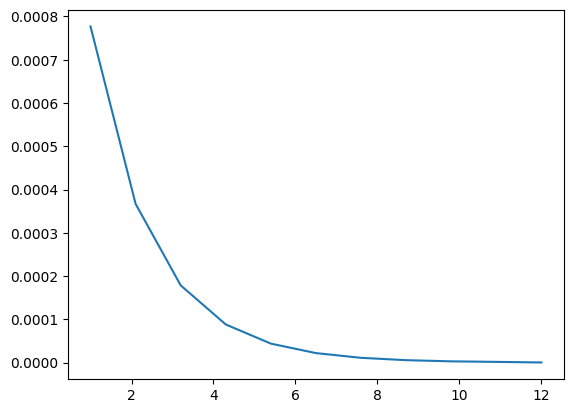

In [78]:
def A_new(n):
  main_diag_new=6*np.ones(n)
  sub_diag1_new=-4*np.ones(n)
  sub_diag2_new=np.ones(n)
  diagonals_new=[sub_diag2_new,sub_diag1_new,main_diag_new,sub_diag1_new,sub_diag2_new]
  offsets_new=[-2,-1,0,1,2]
  A_new=diags(diagonals_new,offsets_new,shape=(n,n),format="csc")
  A_new[0,0:4]=[16,-9,8/3,-1/4]
  A_new[n-1,n-4:n]=[-1/4,8/3,-9,16]
  return A_new

#n=9
#h=Length/n
#plt.figure()
#plt.plot(np.linspace(0,Length,n+2),np.concatenate(([0],spsolve(A_new(n),(h**4/(I*E))*sx(n)),[0])))
#plt.plot(np.linspace(0,Length,100),correct7(np.linspace(0,Length,100)))
#plt.show()

corrections=[]
for i in range(11):
  n=10*2**(i+1)-1
  h=Length/n
  y=spsolve(A_new(n),(h**4/(I*E))*sx(n))
  corrections.append(abs(correct7(Length/2)-y[n//2]))

plt.plot(np.linspace(1,12,11),corrections)



